<a href="https://colab.research.google.com/github/Lawrence-Krukrubo/Immigrations_Data_Visualization_with_Matplotlib/blob/master/Part_5_Histograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, let's import the data we'd cleaned and processed from Github, which we used last in Part 4.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = 'https://raw.githubusercontent.com/Lawrence-Krukrubo/Immigrations_Data_Visualization_with_Matplotlib/master/part3_canada_df.csv'

In [3]:
canada_df = pd.read_csv(data)
canada_df.head()

,Country,Continent,Region,Status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total,Migration_Rate
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639,Low
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699,Low
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439,Low
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6,Low
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15,Low


In [4]:
canada_df.shape

(195, 40)

Since we may be referring often to columns from 1980 to 2013, let's save these as a list of strings

In [5]:
# Let's save the years columns from 1980 to 2013 in a variable called.. You guessed right! years
years = [str(year) for year in range(1980,2014)]

For Part 5, we shall continue Explorative Data Analysis (EDA) and displaying visual plots that depict our analysis. The dataset we shall explore is the immigration to Canada dataset from 194 countries to Canada from 1980 to 2013.

Next, let's set the index of the Dataframe to Country. So we can easily refer to countries by their names as we explore the data.

In [6]:
canada_df.set_index('Country', drop=True, inplace=True)
canada_df.head()

,Continent,Region,Status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total,Migration_Rate
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639,Low
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699,Low
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439,Low
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6,Low
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15,Low


In [7]:
"""
If we want to remove the Country label above the index, we could simply do :-
canada_df.index.name = None
"""

'\nIf we want to remove the Country label above the index, we could simply do :-\ncanada_df.index.name = None\n'

<font color='yellow'><h3><b>3. Histogram:</b></h3></font>

A Histogram is a way of representing the frequency distribution of a numeric data set. It works by partitioning the spread of the numeric data into bins, assigns each data point in the data set into bins and then counts the number of Data points that have been assigned to each bin.
So the vertical axis is actually the frequency or the number of data points in each bin.

**Question 1:** What is the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?

Let's try to visualize the immigrations to Canada in the year 2013, using our data set... The easiest way to do that is with a histogram

In [54]:
# Let's create a fontdict for the font style and properties

dict_={'fontsize': 14,
       'family': 'serif',
        'fontweight' : 'bold',
        'verticalalignment': 'baseline',
      'color': 'darkred'}

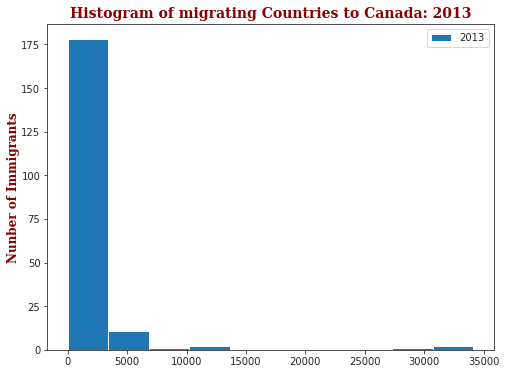

In [9]:
sns.set_style('ticks')
df_2013 = canada_df[['2013']]
df_2013.plot(kind='hist', figsize=(8,6))


plt.title('Histogram of migrating Countries to Canada: 2013', fontdict=dict_)

dict_['fontsize'] = 12
plt.ylabel('Nunber of Immigrants', fontdict=dict_)
plt.show()

But notice how the bins are not aligned with the tick marks of the horizontal axis. This can make it hard to read. So lets try to fix this in order to make the histogram more effective.
One way to solve this is to borrow the histogram function from numpy library

In [10]:
df_2013.head()

,2013
Country,
Afghanistan,2004
Albania,603
Algeria,4331
American Samoa,0
Andorra,1


In [11]:
count, bin_edges = np.histogram(df_2013['2013'])
print('Count is:',count, 'and Bin-edges is:', bin_edges)

Count is: [178  11   1   2   0   0   0   0   1   2] and Bin-edges is: [    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


By default, the `histrogram` method breaks up the dataset into 10 bins. The figure below summarizes the bin ranges and the frequency distribution of immigration in 2013. We can see that in 2013:
* 178 countries contributed between 0 to 3412.9 immigrants 
* 11 countries contributed between 3412.9 to 6825.8 immigrants
* 1 country contributed between 27303.2 to 30716.1 immigrants,
* And 2 countries contributed between 30716.1 and 34129 immigrants..

In [12]:
df_2013.sort_values(by='2013', ascending=False).head()

,2013
Country,
China,34129
India,33087
Philippines,29544
Pakistan,12603
Iran (Islamic Republic of),11291


And from the above sorting exercise, we can see the two countries that contributed between 30716.1 and 34129 immigrants (China and india) in 2013. As well as the single country that contributed between 27303.2 and 30716.1 immigrants (Philippines).

So let's replot the histogram using the bin-edges from numpy. Then we can add some little customizations like `edge-color` and `linewidth`

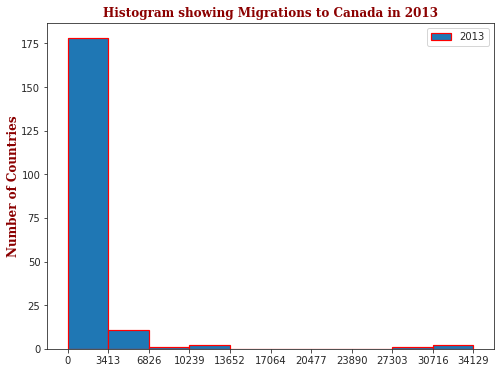

In [13]:
df_2013.plot(kind='hist', figsize=(8, 6), xticks= bin_edges, edgecolor='red', linewidth=1.2)

plt.title("Histogram showing Migrations to Canada in 2013", fontdict=dict_)

dict_['fontsize'] = 12
plt.ylabel('Number of Countries', fontdict=dict_)

plt.show()

<h4>More on the Plot() method:</h4>


Note that we can also use the plot method with a chart function directly, chained together. For example, we can do `df_2013.plot.hist()` directly. This can also be done for all the charts callable by the plot method such as:
1. Area
2. bar
3. barh
4. Box
5. Density
6. Hexbin
7. Hist
8. KDE
9. Pie 
10. Scatter

Let's try it on the histogram and even change the color of the histograms to aqua.

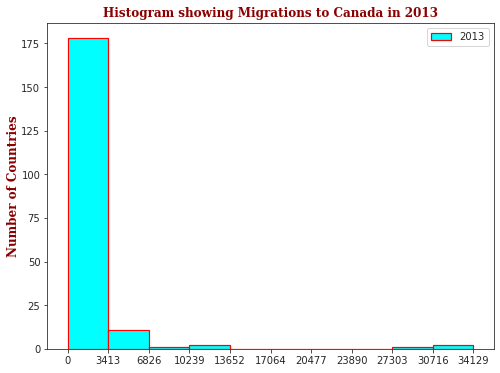

In [14]:
df_2013.plot.hist(xticks=bin_edges, figsize=(8, 6), edgecolor='red', linewidth=1.2, color='aqua')

plt.title("Histogram showing Migrations to Canada in 2013", fontdict=dict_)

dict_['fontsize'] = 12
plt.ylabel('Number of Countries', fontdict=dict_)

plt.show()

We can further customise our ticks to texts that display some data, <br>for example converting 3413 of the first x-tick label above to '3k+' and do on. 

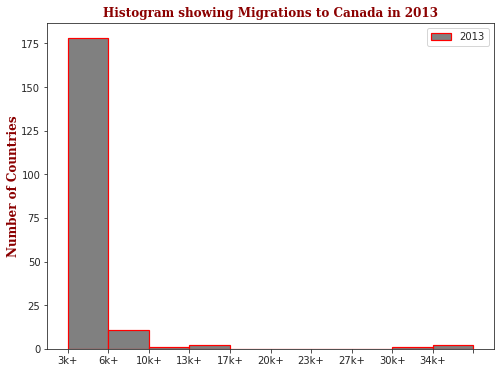

In [15]:
df_2013.plot.hist(figsize=(8, 6), edgecolor='red', linewidth=1.2, color='gray')

plt.title("Histogram showing Migrations to Canada in 2013", fontdict=dict_)
plt.xticks(bin_edges, ['3k+', '6k+', '10k+', '13k+', '17k+', '20k+', '23k+', '27k+', '30k+', '34k+'])

dict_['fontsize'] = 12
plt.ylabel('Number of Countries', fontdict=dict_)

plt.show()

<h3>STACKED and UN-STACKED HISTOGRAMS</h3>

**Question2:** What is the immigration distribution for Nigeria, Ghana, and Kenya for years 1980 - 2013?

In [16]:
df_NigGhaKen = canada_df.loc[['Nigeria', 'Ghana', 'Kenya'], years]
df_NigGhaKen.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Nigeria,81,60,58,58,78,78,114,149,122,195,181,281,498,428,323,430,531,657,757,966,1182,1426,1403,1064,1518,2236,2594,2375,2109,3156,3906,3103,3443,4172
Ghana,172,196,98,122,116,172,215,970,408,429,449,1134,2502,2201,1341,1475,1219,1274,1040,845,959,782,696,564,738,851,710,688,629,659,802,528,531,517
Kenya,291,296,221,201,218,245,244,628,984,1140,869,605,529,478,414,434,369,223,203,310,495,651,630,678,685,693,622,449,453,489,507,585,725,664


Let's transpose the DataFrame

In [17]:
df_NigGhaKen = df_NigGhaKen.T
df_NigGhaKen.head()

Country,Nigeria,Ghana,Kenya
1980,81,172,291
1981,60,196,296
1982,58,98,221
1983,58,122,201
1984,78,116,218


Once again, let's borrow the bin-edges from numpy and plot the histogram for NigGhaKen

In [44]:
count, bin_edges = np.histogram(df_NigGhaKen)

print(f'Count is {count}\nBin-edges is {bin_edges}')

Count is [40 35 11  5  1  4  1  2  1  2]
Bin-edges is [  58.   469.4  880.8 1292.2 1703.6 2115.  2526.4 2937.8 3349.2 3760.6
 4172. ]


Let's plot the histogram

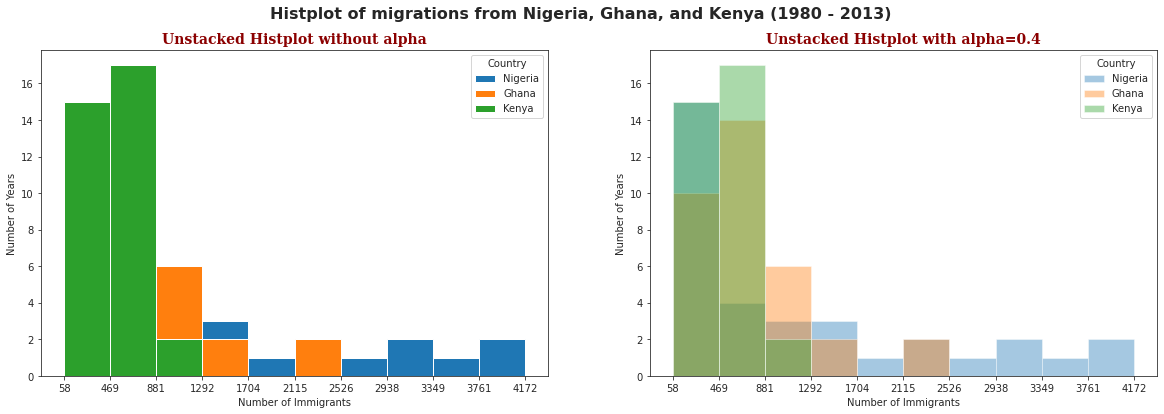

In [67]:
fig = plt.figure(figsize=(20,6))
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

# set a suptitle for the plots
fig.suptitle('Histplot of migrations from Nigeria, Ghana, and Kenya (1980 - 2013)', fontweight='bold', fontsize=16)

# For Stacked Histplot without alpha
df_NigGhaKen.plot(kind='hist', xticks=bin_edges, ax=ax0)

ax0.set_title('Unstacked Histplot without alpha', fontdict=dict_)
ax0.set_ylabel('Number of Years')
ax0.set_xlabel('Number of Immigrants')

# For Stacked Histplot with alpha 0.4
df_NigGhaKen.plot(kind='hist', xticks=bin_edges, alpha=0.4, ax=ax1)

ax1.set_title('Unstacked Histplot with alpha=0.4', fontdict=dict_)
ax1.set_ylabel('Number of Years')
ax1.set_xlabel('Number of Immigrants')


plt.show()

In [64]:
nigeria_bin1 = [i for i in df_NigGhaKen['Nigeria'] if i >= 58 and i <= 470]
ghana_bin1 = [i for i in df_NigGhaKen['Ghana'] if i >= 58 and i <= 470]
kenya_bin1 = [i for i in df_NigGhaKen['Kenya'] if i >= 58 and i <= 470]

print(f'Nigeria = {len(nigeria_bin1)},\nGhana = {len(ghana_bin1)},\nKenya = {len(kenya_bin1)}.')

Nigeria = 15,
Ghana = 10,
Kenya = 15.


<b>Let's make a few modifications to improve the impact and aesthetics of the previous plot:
* increase the bin size to 15 by passing in `bins` parameter
* set transparency to 60% by passing in `alpha` paramemter
* label the x-axis by passing in `x-label` paramater
* change the colors of the plots by passing in `color` parameter</b>

In [20]:
# Let's adjust the binsize and the xticks value to 15, since we want 15 bins

count, bin_edges = np.histogram(df_NigGhaKen, 15)

print('Count is:', count)
print('Bin-Edges is:', bin_edges)

Count is: [30 23 22  8  6  2  0  3  2  1  0  2  1  0  2]
Bin-Edges is: [  58.          332.26666667  606.53333333  880.8        1155.06666667
 1429.33333333 1703.6        1977.86666667 2252.13333333 2526.4
 2800.66666667 3074.93333333 3349.2        3623.46666667 3897.73333333
 4172.        ]


<h5>UNSTACKED HISTOGRAMS</h5>

Lets Re-plot the histogram passing in alpha and color parameters
This is an Unstacked-Histogram.

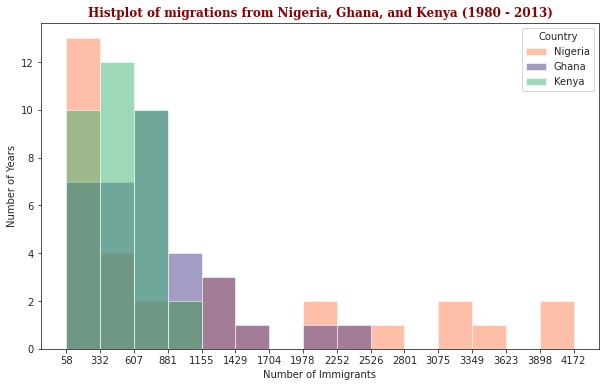

In [21]:
df_NigGhaKen.plot(kind='hist', 
                  figsize=(10, 6), 
                  xticks=bin_edges, 
                  color=['coral', 'darkslateblue', 'mediumseagreen'],
                 alpha=0.5,
                 bins=15)

plt.title('Histplot of migrations from Nigeria, Ghana, and Kenya (1980 - 2013)', fontdict=dict_)
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

So it's clear that by spreading the bins, and adding alpha to the stacked histograms, we can clearly see the distribution of data. For example:

1. Nigeria has 13 years between 1980 to 2013 with a range of 28 to 332 immigrants.
2. Ghana has 7 years between 1980 to 2013 with same range of immigrants
3. Kenya also has 10 years with same range of immigrants.

In [22]:
# let's prove the above statements
Gha_bin_1 = [i for i in df_NigGhaKen['Ghana'] if i >= 58 and i <= 332]
Ken_bin_1 = [i for i in df_NigGhaKen['Kenya'] if i >= 58 and i <= 332]
Nig_bin_1 = [i for i in df_NigGhaKen['Nigeria'] if i >= 58 and i <= 332]

print(f'For Nigeria: Bin one has {len(Nig_bin_1)} immigrants.\nFor Ghana: Bin one has {len(Gha_bin_1)} immigrants.\nFor Kenya: Bin one has {len(Ken_bin_1)} immigrants')

For Nigeria: Bin one has 13 immigrants.
For Ghana: Bin one has 7 immigrants.
For Kenya: Bin one has 10 immigrants


<h5>STACKED HISTOGRAMS</h5>

If we do not want the plots to overlap each other, we can stack them using the stacked parameter. Let's also adjust the min and max x-axis labels to remove the extra gap on the edges of the plot. We can pass a tuple (min,max) using the xlim parameter, as show below.

In [23]:
count, bin_edges = np.histogram(df_NigGhaKen, 15)

xmin = bin_edges[0] -10  #  first bin value is 58.0, adding buffer of 10 for aesthetic purposes

xmax = bin_edges[-1] +10  #  last bin value is 4172.0, adding buffer of 10 for aesthetic purposes

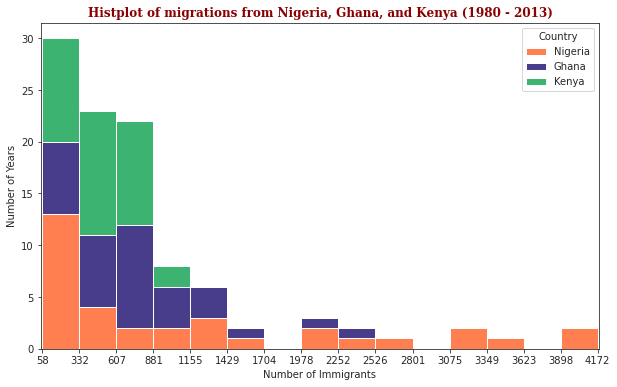

In [24]:
df_NigGhaKen.plot(kind='hist', 
                  figsize=(10, 6), 
                  xticks=bin_edges, 
                  color=['coral', 'darkslateblue', 'mediumseagreen'],
                 bins=15,
                 stacked=True,
                 xlim=(xmin, xmax))

plt.title('Histplot of migrations from Nigeria, Ghana, and Kenya (1980 - 2013)', fontdict=dict_)
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

**Question 3:** Use the scripting layer to display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

In [25]:
# First, let's select the data for Greece, Albania and Bulgaria
df_GreeceAlbaniaBulgaria = canada_df.loc[['Greece', 'Albania', 'Bulgaria'], years].T
df_GreeceAlbaniaBulgaria.head()

Country,Greece,Albania,Bulgaria
1980,1065,1,24
1981,953,0,20
1982,897,0,12
1983,633,0,33
1984,580,0,11


In [26]:
# Next let's define the bin size using np.hist function
count, bin_edges = np.histogram(df_GreeceAlbaniaBulgaria, 15)

print(f'Count is: {count}\nBin is {bin_edges}')

Count is: [37  9  4  6 13  9  5  5  3  3  2  3  1  1  1]
Bin is [   0.   134.8  269.6  404.4  539.2  674.   808.8  943.6 1078.4 1213.2
 1348.  1482.8 1617.6 1752.4 1887.2 2022. ]


Finally, let's plot the histogram according to question specs, this time, let's set the fontstyle of the title to 'oblique'.

Note that fontstyles can be 

1. 'normal', 
2. 'italic', 
3. 'oblique'

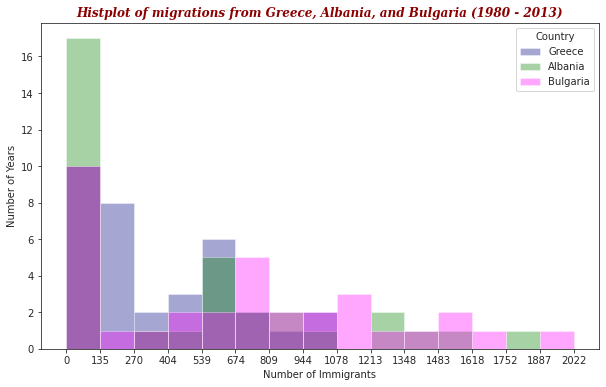

In [27]:
df_GreeceAlbaniaBulgaria.plot.hist(figsize=(10,6),
                   xticks=bin_edges,
                   stacked=False,
                   alpha=0.35,
                   color=['navy','green','magenta'],
                   bins=len(count))

plt.title('Histplot of migrations from Greece, Albania, and Bulgaria (1980 - 2013)', fontstyle='oblique', fontdict=dict_)
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

**Question 4:** Use the Artist layer to display the immigration distribution for the top 5 Countries to Canada for the years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.5.

In [28]:
canada_df.head()

,Continent,Region,Status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total,Migration_Rate
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639,Low
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699,Low
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439,Low
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6,Low
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15,Low


In [29]:
# First we select the top 5 countries
top_5 = canada_df.sort_values(by='Total', ascending=False).head()

# Let's select only the index countries and the years and also Transpose it
top_5 = top_5.loc[top_5.index, years].T

top_5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


The country name for Great Britain and Northern Ireland is too long, let's rename it

In [30]:
top_5.rename(columns={'United Kingdom of Great Britain and Northern Ireland':'United_Kingdom(GB/NI)'}, inplace=True)
top_5.head()

Country,India,China,United_Kingdom(GB/NI),Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


In [31]:
# Next let's make the bins
count, bin_edges = np.histogram(top_5, 15)
print('Count is:', count)
print('Bin-Edges is:', bin_edges)

Count is: [20 15 25 22 20  5  8  8  6  7 13 10  8  2  1]
Bin-Edges is: [  514.          3318.66666667  6123.33333333  8928.
 11732.66666667 14537.33333333 17342.         20146.66666667
 22951.33333333 25756.         28560.66666667 31365.33333333
 34170.         36974.66666667 39779.33333333 42584.        ]


Now let's make the title fontstyle italic and bold

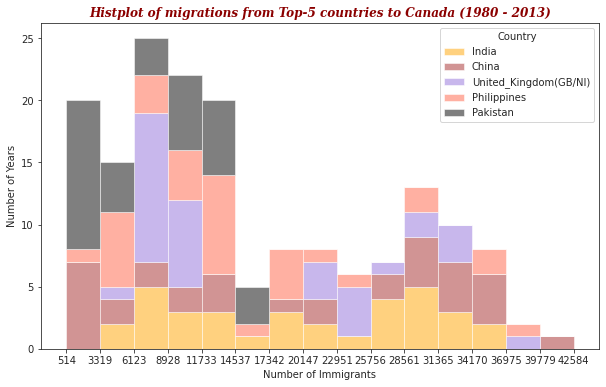

In [32]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 

# Artist layer Histogram
top_5.plot.hist(xticks=bin_edges,
                   stacked=True,
                   alpha=0.5,
                   color=['orange','brown','mediumpurple', 'tomato', 'black'],
                   figsize=(10,6),
                bins=len(count),
                ax=ax)

ax.set_title('Histplot of migrations from Top-5 countries to Canada (1980 - 2013)',fontstyle='italic', fontdict=dict_)
ax.set_ylabel('Number of Years')
ax.set_xlabel('Number of Immigrants')

plt.show()

In the example above, we create a Figure instance using `matplotlib.pyplot.figure()`, which is a convenience method for instantiating Figure instances and connecting them with our user interface or drawing toolkit `FigureCanvas`. Since we are focusing here on the Artist layer, we'll let pyplot of the scripting layer, handle some of those details for us: 

Finally, let's change the x-tick labels to reader-friendly representations and slightly expand the width of the chart for visibility. We'd also make the title fontstyle normal and bold, and play with the colors too

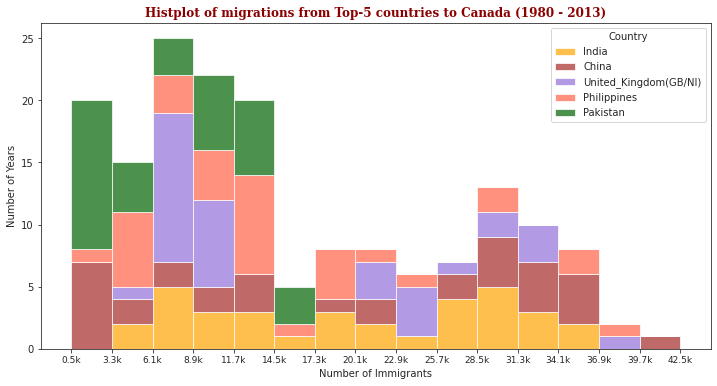

In [33]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 

# Artist layer Histogram
top_5.plot.hist(xticks=bin_edges,
                stacked=True,
                   alpha=0.7,
                   color=['orange','brown','mediumpurple', 'tomato', 'darkgreen'],
                   figsize=(12,6),
                bins=len(count),
                ax=ax)

ax.set_title('Histplot of migrations from Top-5 countries to Canada (1980 - 2013)',fontstyle='normal', fontdict=dict_)
ax.set_ylabel('Number of Years')
ax.set_xlabel('Number of Immigrants')
ax.set_xticklabels(['0.5k', '3.3k', '6.1k', '8.9k', '11.7k', '14.5k', '17.3k', '20.1k', '22.9k', '25.7k', '28.5k', \
                        '31.3k', '34.1k', '36.9k', '39.7k', '42.5k'], fontsize=9)

plt.show()

<b><h3>Comparing Stacked and Unstacked Histplots:</h3></b>

Just as we compared and analysed Stacked and Unstacked Area Plots in part 4, let's see the Stacked and Unstacked Histogram plots together.<br>
Let's look at the plots from Nigeria , Ghana and Kenya again.


In [34]:
count, bin_edges = np.histogram(df_NigGhaKen, 15)

xmin = bin_edges[0] -10  #  first bin value is 58.0, adding buffer of 10 for aesthetic purposes

xmax = bin_edges[-1] +10  #  last bin value is 4172.0, adding buffer of 10 for aesthetic purposes

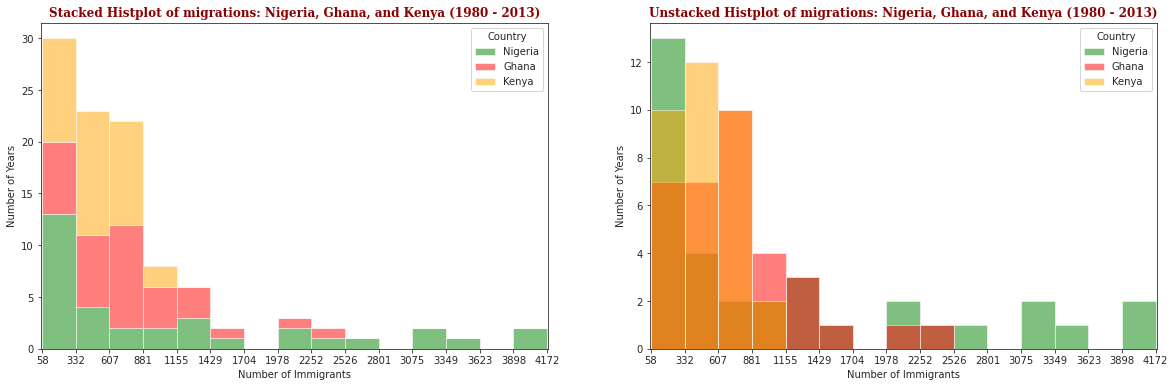

In [35]:
fig = plt.figure(figsize=(20, 6))

ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

# Plotting the Stacked Histogram
df_NigGhaKen.plot(kind='hist',  
                  xticks=bin_edges, 
                  color=['green', 'red', 'orange'],
                 bins=15,
                 stacked=True,
                 xlim=(xmin, xmax),
                  alpha=0.5,
                  ax=ax0)

ax0.set_title('Stacked Histplot of migrations: Nigeria, Ghana, and Kenya (1980 - 2013)', fontdict=dict_)
ax0.set_ylabel('Number of Years')
ax0.set_xlabel('Number of Immigrants')

# Plotting the Unstacked Plot
df_NigGhaKen.plot(kind='hist',  
                  xticks=bin_edges, 
                  color=['green', 'red', 'orange'],
                 bins=15,
                 stacked=False,
                 xlim=(xmin, xmax),
                  alpha=0.5,
                  ax=ax1)

ax1.set_title('Unstacked Histplot of migrations: Nigeria, Ghana, and Kenya (1980 - 2013)', fontdict=dict_)
ax1.set_ylabel('Number of Years')
ax1.set_xlabel('Number of Immigrants')


plt.show()

In [36]:
Gha_bin_1 = [i for i in df_NigGhaKen['Ghana'] if i >= 58 and i <= 332]
Ken_bin_1 = [i for i in df_NigGhaKen['Kenya'] if i >= 58 and i <= 332]
Nig_bin_1 = [i for i in df_NigGhaKen['Nigeria'] if i >= 58 and i <= 332]

print(f'For Nigeria: Bin one has {len(Nig_bin_1)} immigrants.\nFor Ghana: Bin one has {len(Gha_bin_1)} immigrants.\nFor Kenya: Bin one has {len(Ken_bin_1)} immigrants')

For Nigeria: Bin one has 13 immigrants.
For Ghana: Bin one has 7 immigrants.
For Kenya: Bin one has 10 immigrants


<h3>Recap:</h3>

<b><h5>Interpreting the stacked histogram:</h5></b>

Though it looks daunting, it's actually quite easy to understand the stacked histograms displayed here.

For example:<br>
Taking the first bin of values between 58 to 332, The stacked histogram is simply telling us that:
1. For the entire length of the stack, which is about 30 years high,
2. Nigeria has 13 years with immigrants in the range 58 to 332, distinctively stacked at the base of the mount.
3. Ghana has 7 years of migrants in the range 58 to 332, also stacked distinctively ontop Nigeria.
4. While, Kenya has 10 years also distinctively stacked on Ghana.

This makes a total of 30 years in the stack of bin-1 (13 + 7 + 10).



<b><h5>Interpreting the unstacked histogram:</h5></b>

For the unstacked histogram, the same analogy holds except that the years are not stacked distinctively for each country:- Nigeria, Ghana and Kenya. Instead we see a simple stack for the height of the highest country years - Nigeria, height of 13. Then we see markings at points 7 and 10 indicating the years for Ghana and Kenya respectively.
Also, because the stacks are not distinct, we can see the color distortions or mutations in the unstacked plot as the green red and orange colors are mixed together in the stack for the first bin.

Thus, unstacked is not stacked but squashed, while stacked is distinctively stacked on each one.

<h3>Matplotlib Full Colors List</h3>

Matplotlib has about 148 different colors and 26 different plot styles as we saw in Part 1.<br>If you're ever in need of more colors for your plots, just run the cell below to see the colors of Matplotlib.

Let's save the Matplotlib colors and their respective HTML codes in a dictionary using a dictionary comprehension.

In [37]:
import matplotlib as mpl
mpl_color_dict = {name: hex for name, hex in mpl.colors.cnames.items()}
mpl_color_dict

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3

In [38]:
len(mpl_color_dict)

148